In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

In [78]:
df = pd.read_csv('stock_price_scaled.csv', index_col='date', parse_dates=True)
df.head()
df_train = df.loc['2000':'2020']['close'].resample('M').mean()
df_test = df.loc['2021']['close'].resample('M').mean()
print(f'{df_train.shape=}, {df_test.shape=}')

df_train.shape=(252,), df_test.shape=(12,)


C:\Users\nabem\AppData\Local\Temp\ipykernel_21836\3003054680.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_train = df.loc['2000':'2020']['close'].resample('M').mean()
C:\Users\nabem\AppData\Local\Temp\ipykernel_21836\3003054680.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_test = df.loc['2021']['close'].resample('M').mean()


In [79]:
model = ARIMA(df_train, order=(5,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  252
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 298.051
Date:                Sun, 17 Nov 2024   AIC                           -582.103
Time:                        23:24:15   BIC                           -557.424
Sample:                    01-31-2000   HQIC                          -572.172
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8881      0.086     10.276      0.000       0.719       1.057
ar.L2         -0.0190      0.075     -0.253      0.801      -0.166       0.128
ar.L3          0.0034      0.061      0.055      0.9

c:\Users\nabem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
history = [x for x in df_train]
model_predictions = []
for time in range(len(df_test)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    model_predictions.append(output[0])
    test_value = df_test[time]
    history.append(test_value)

c:\Users\nabem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nabem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\nabem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nabem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn

2021-01-31    0.279410
2021-02-28    0.276827
2021-03-31    0.239979
2021-04-30    0.221163
2021-05-31    0.229310
2021-06-30    0.245383
2021-07-31    0.263978
2021-08-31    0.274987
2021-09-30    0.279343
2021-10-31    0.282576
2021-11-30    0.286248
2021-12-31    0.291892
2022-01-31    0.298583
2022-02-28    0.304910
2022-03-31    0.310600
2022-04-30    0.315556
2022-05-31    0.320146
2022-06-30    0.324696
2022-07-31    0.329224
2022-08-31    0.333698
Freq: ME, Name: predicted_mean, dtype: float64


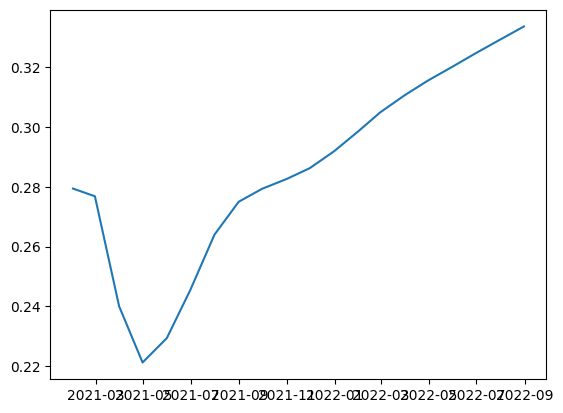

In [80]:
pred = model_fit.forecast(steps=20)
plt.plot(pred, label='True')
print(pred)

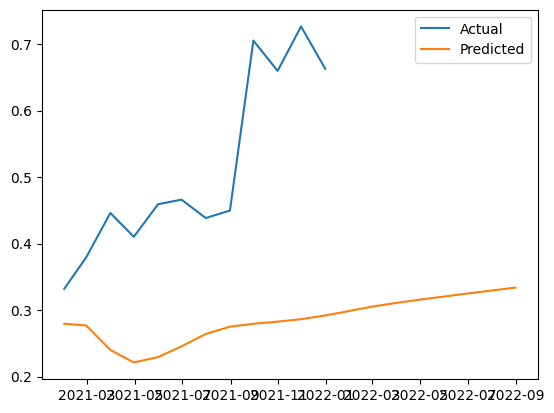

2021-01-31    0.279410
2021-02-28    0.276827
2021-03-31    0.239979
2021-04-30    0.221163
2021-05-31    0.229310
2021-06-30    0.245383
2021-07-31    0.263978
2021-08-31    0.274987
2021-09-30    0.279343
2021-10-31    0.282576
2021-11-30    0.286248
2021-12-31    0.291892
2022-01-31    0.298583
2022-02-28    0.304910
2022-03-31    0.310600
2022-04-30    0.315556
2022-05-31    0.320146
2022-06-30    0.324696
2022-07-31    0.329224
2022-08-31    0.333698
Freq: ME, Name: predicted_mean, dtype: float64

In [81]:
# start = datetime(2019, 1, 1)
# end = datetime(2021, 1, 1)
# predict_index = pd.bdate_range(start=start, end=end, freq='D')
plt.plot(df_test, label='Actual')
plt.plot(pred, label='Predicted')
plt.legend()
plt.show()
pred

In [ ]:
# from datetime import datetime
# start = datetime(2023, 1, 1)
# end = datetime(2023, 1, 31)
# y = result.get_forecast(steps=31)
# y_index = pd.bdate_range(start=start, end=end, freq='D')
# y_values = y.predicted_mean
# y_ci = y.conf_int()
# y_ci
# plt.plot(y_index, y_values, label='predicted')
# plt.plot(data.loc['2023-01-01':'2023-01-31']['close'], label='actual')
# print(y_index)

NameError: name 'result' is not defined

In [ ]:
a = [[1,2,3], [4,5,6], [7,8,9]]
b  = [x for x in a]
b

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

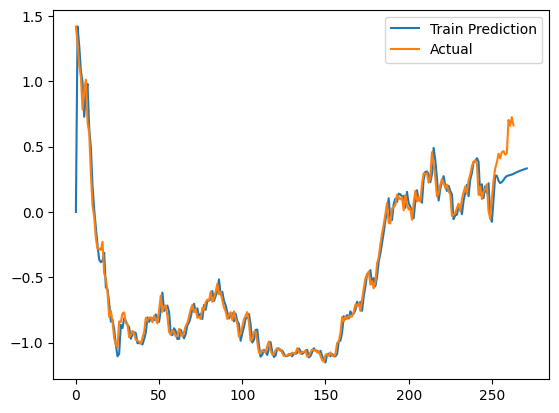

In [83]:
train_pred = model_fit.predict(start=0, end=len(df_train)-1)
plt.plot(np.append(train_pred, pred), label='Train Prediction')
plt.plot(np.append(df_train, df_test), label='Actual')
plt.legend()

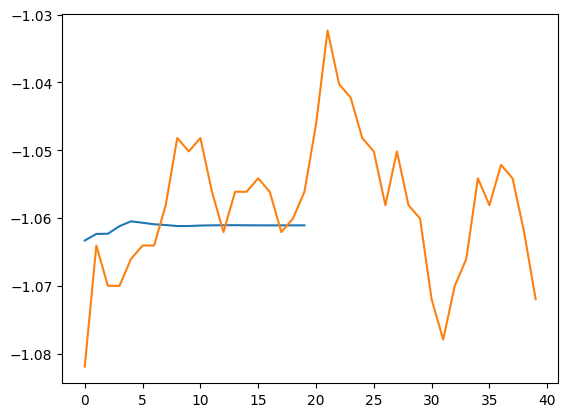

In [77]:
np.append(train_pred, pred)
plt.plot(pred, label='Predicted')
plt.plot(df.loc['2011-12':'2012-01']['close'].values, label='Actual')